In [34]:
import pandas as pd
from plotnine import *

## Q1

### a)

In [35]:
df = pd.read_csv('hospital_charge.csv')

df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')

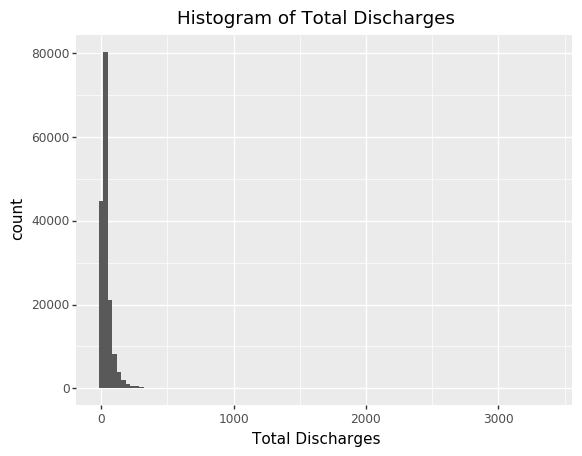

<ggplot: (7587910469)>


In [41]:
plot = (ggplot() + geom_histogram(df,aes(x=' Total Discharges '), bins = 100)
       + labs(title='Histogram of Total Discharges', x='Total Discharges', y='count'))
print(plot)

In [37]:
df.describe()

,Provider Id,Provider Zip Code,Total Discharges
count,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304
std,151563.671767,27854.323080,51.104042
min,10001.000000,1040.000000,11.000000
25%,110092.000000,27261.000000,17.000000
50%,250007.000000,44309.000000,27.000000
75%,380075.000000,72901.000000,49.000000
max,670077.000000,99835.000000,3383.000000


In [38]:
df

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44
...,...,...,...,...,...,...,...,...,...,...,...,...
163060,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,$26314.39,$3806.86,$3071.39
163061,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,$21704.72,$4027.36,$2649.72
163062,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,$39121.73,$5704.36,$4058.36
163063,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,$28873.09,$7663.09,$6848.54


### b)

In [39]:
df[' Average Covered Charges '].hist()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11559fcb0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1155a6f80> (for post_execute):


KeyboardInterrupt: 

In [43]:
# Average Total Payments vs. Average Medicare Payments

plot = (ggplot() + geom_point(df,aes(x=' Average Total Payments ', y='Average Medicare Payments'))
       + labs(title='Histogram of Total Discharges', x='Total Discharges', y='count'))
print(plot)

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11559fcb0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1155a6f80> (for post_execute):


KeyboardInterrupt: 

## Q2

In [82]:
df['Average Covered Charges_float'] = df[' Average Covered Charges '].apply(lambda x: float(x[1:]))
df_transformed = pd.pivot_table(df,index=['Provider Id','Provider State'], columns=['DRG Definition'], values=['Average Covered Charges_float'],aggfunc='first')
df_transformed.columns = df_transformed.columns.droplevel()
df_transformed = df_transformed.reset_index()
df_transformed

DRG Definition,Provider Id,Provider State,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC,069 - TRANSIENT ISCHEMIA,074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O MCC,101 - SEIZURES W/O MCC,...,812 - RED BLOOD CELL DISORDERS W/O MCC,853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W/O MCC,885 - PSYCHOSES,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,948 - SIGNS & SYMPTOMS W/O MCC
0,10001,AL,32963.07,20312.78,38820.39,27345.10,17605.51,20688.83,18489.15,19619.7,...,19670.22,73419.78,129694.04,44643.01,25434.18,17627.12,12254.78,53962.00,16583.15,19081.72
1,10005,AL,15131.85,NaN,22946.38,16930.43,17170.27,14260.00,NaN,NaN,...,11610.00,NaN,NaN,26056.59,14409.25,NaN,NaN,NaN,4973.93,9381.09
2,10006,AL,37560.37,NaN,45393.21,27320.14,16392.37,17091.66,NaN,18362.2,...,19065.81,160186.05,NaN,49858.93,21602.83,10376.13,10866.42,34537.27,14834.22,17894.59
3,10007,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7808.31,NaN,NaN,22160.90,NaN,NaN,NaN,NaN,NaN,6891.18
4,10008,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8937.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,670072,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9132.27,NaN,NaN,NaN,NaN
3333,670073,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3334,670075,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3335,670076,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Q3

In [94]:
dd = df_transformed.corr()
dd = dd.replace(1,0)
dd.max().idxmax()
dd

DRG Definition,Provider Id,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC,069 - TRANSIENT ISCHEMIA,074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O MCC,101 - SEIZURES W/O MCC,149 - DYSEQUILIBRIUM,...,812 - RED BLOOD CELL DISORDERS W/O MCC,853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W/O MCC,885 - PSYCHOSES,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,948 - SIGNS & SYMPTOMS W/O MCC
DRG Definition,,,,,,,,,,,,,,,,,,,,,
Provider Id,0.000000,-0.230379,-0.122093,-0.213422,-0.180671,-0.165506,-0.162017,-0.110087,-0.145764,-0.102380,...,-0.148108,-0.250296,-0.223913,-0.228217,-0.217648,-0.065500,-0.131534,-0.159224,-0.167160,-0.156397
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,-0.230379,0.000000,0.656754,0.717582,0.718394,0.732983,0.717949,0.698070,0.656901,0.696562,...,0.690353,0.743055,0.699862,0.736169,0.709679,0.504986,0.607963,0.675141,0.651122,0.714371
057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC,-0.122093,0.656754,0.000000,0.834587,0.874906,0.845503,0.855860,0.832355,0.843774,0.828393,...,0.830535,0.807572,0.785910,0.854414,0.848592,0.753401,0.791598,0.812981,0.860554,0.850322
064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC,-0.213422,0.717582,0.834587,0.000000,0.925206,0.903683,0.881511,0.843051,0.858578,0.866683,...,0.826781,0.864519,0.849107,0.911552,0.890694,0.695348,0.795897,0.856085,0.845247,0.868342
065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC,-0.180671,0.718394,0.874906,0.925206,0.000000,0.954392,0.942679,0.882938,0.896287,0.911128,...,0.861693,0.859575,0.842951,0.923703,0.917264,0.734893,0.824652,0.855146,0.864163,0.896990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885 - PSYCHOSES,-0.065500,0.504986,0.753401,0.695348,0.734893,0.716961,0.711159,0.684108,0.750084,0.703911,...,0.696159,0.663228,0.624657,0.712725,0.734046,0.000000,0.815921,0.749678,0.796271,0.761823
897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC,-0.131534,0.607963,0.791598,0.795897,0.824652,0.828939,0.812649,0.815304,0.805641,0.811985,...,0.803863,0.762272,0.788724,0.817113,0.807657,0.815921,0.000000,0.792986,0.842394,0.835717
917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,-0.159224,0.675141,0.812981,0.856085,0.855146,0.828826,0.830320,0.812822,0.825151,0.820910,...,0.854516,0.825327,0.832640,0.885207,0.868255,0.749678,0.792986,0.000000,0.836779,0.817101
